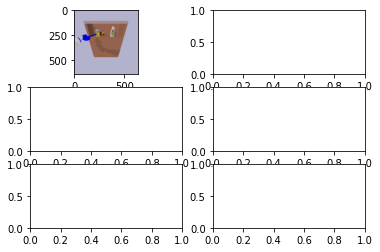

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)

img = mpimg.imread('demo-videos/ycb-prob-5-1-1/traj-main/1-2.png')
ax1.imshow(img)

uint8
(1610, 1285, 3)
[230 230 230]
[230 230 230 255]


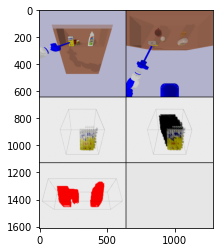

In [42]:
import cv2
import numpy as np
img1 = cv2.imread('demo-videos/ycb-prob-5-1-1/traj-main/1-2.png')
img2 = cv2.imread('demo-videos/ycb-prob-5-1-1/traj-vis/1-2.png')
img3 = cv2.imread('demo-videos/ycb-prob-5-1-1/opt-img/1.png')
img4 = cv2.imread('demo-videos/ycb-prob-5-1-1/conrv-img/1.png')
img5 = cv2.imread('demo-videos/ycb-prob-5-1-1/occlude/1.png')

print(img1.dtype)
# print(img1.max())
padding = 5
mat = np.zeros((640+480*2+padding*2,640*2+padding,3)).astype(np.uint8)
mat[:640,:640,:] = img1
mat[:640,640+padding:,:] = img2
mat[640+padding:640+padding+480,:640,:] = img3
mat[640+padding:640+padding+480,640+padding:,:] = img4
mat[640+padding*2+480:640+padding*2+480*2,:640,:] = img5
mat[640+padding*2+480:640+padding*2+480*2,640+padding:,:] = 230
# mat[640+padding*2+480:640+padding*2+480*2,640+padding:,:] = img6
# mat[640+padding*3+480*2:,:640,:] = img6
print(mat.shape)

print(mat[1600,1280])
# mat[:640,640+padding:,:] = img2

# vis = np.concatenate((img1, img2), axis=1)
vis = cv2.cvtColor(mat, cv2.COLOR_RGBA2BGRA)
print(vis[1600,1280])

plt.imshow(vis)

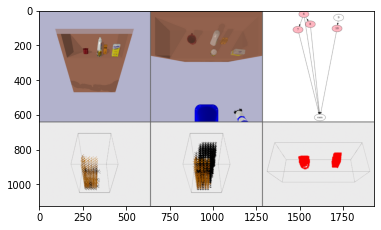

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
prob = 'ycb-prob-5-1-1'
root = 'demo-videos/%s/' % (prob)
folder = 'demo-videos/%s/images/' % (prob)
os.makedirs(folder, exist_ok=True)
dir_list = os.listdir(os.path.join(root, 'traj-main'))
dir_list = [dir_list[0]]
for i in range(len(dir_list)):
    fname = dir_list[i].split('.png')[0]
    traj_id = int(fname.split('-')[0])
    pt_id = int(fname.split('-')[1])
    
    img1 = cv2.imread('demo-videos/%s/traj-main/%d-%d.png' % (prob, traj_id, pt_id))
    img2 = cv2.imread('demo-videos/%s/traj-vis/%d-%d.png' % (prob, traj_id, pt_id))
    img3 = cv2.imread('demo-videos/%s/odg/%d.png' % (prob, traj_id))
    img4 = cv2.imread('demo-videos/%s/opt-img/%d.png' % (prob, traj_id))
    img5 = cv2.imread('demo-videos/%s/conrv-img/%d.png' % (prob, traj_id))
    img6 = cv2.imread('demo-videos/%s/occlude/%d.png' % (prob, traj_id))
    padding = 5
    mat = np.zeros((640+480+padding,640*3+padding*2,3)).astype(np.uint8) + 100
    mat[:640,:640,:] = img1
    mat[:640,640+padding:640*2+padding,:] = img2
    mat[:640,640*2+padding*2:,:] = 255
    # find the start pos
    mid = (640*2+padding*2 + mat.shape[1]) / 2
    start = mid - img3.shape[1]/2
    start = int(start)
    mat[:640,start:start+img3.shape[1],:] = img3

    mat[640+padding:,:640,:] = img4
    mat[640+padding:,640+padding:640*2+padding,:] = img5
    mat[640+padding:,640*2+padding*2:,:] = img6
    vis = cv2.cvtColor(mat, cv2.COLOR_RGBA2BGRA)
#     print(vis[1600,1280])

    plt.imshow(vis)
    
    cv2.imwrite(folder+'%d-%d.png' % (traj_id, pt_id), mat)
    

In [1]:
from tqdm import trange

In [8]:
import cv2
import numpy as np
import os
prob = 'ycb-prob-8-2'
root = 'demo-videos/%s/' % (prob)
folder = 'demo-videos/%s/images/' % (prob)
os.makedirs(folder, exist_ok=True)
dir_list = os.listdir(os.path.join(root, 'traj-main'))
for i in trange(len(dir_list)):
    fname = dir_list[i].split('.png')[0]
    traj_id = int(fname.split('-')[0])
    pt_id = int(fname.split('-')[1])
    
    img1 = cv2.imread('demo-videos/%s/traj-main/%d-%d.png' % (prob, traj_id, pt_id))
    img2 = cv2.imread('demo-videos/%s/traj-vis/%d-%d.png' % (prob, traj_id, pt_id))
    img3 = cv2.imread('demo-videos/%s/odg/%d.png' % (prob, traj_id))
    img4 = cv2.imread('demo-videos/%s/opt-img/%d.png' % (prob, traj_id))
    img5 = cv2.imread('demo-videos/%s/conrv-img/%d.png' % (prob, traj_id))
    img6 = cv2.imread('demo-videos/%s/occlude/%d.png' % (prob, traj_id))
    padding = 5
    mat = np.zeros((640+480+padding,640*3+padding*2,3)).astype(np.uint8) + 100
    mat[:640,:640,:] = img1
    mat[:640,640+padding:640*2+padding,:] = img2
    mat[:640,640*2+padding*2:,:] = 255
    # find the start pos
    mid = (640*2+padding*2 + mat.shape[1]) / 2
    start = mid - img3.shape[1]/2
    start = int(start)
    mat[:640,start:start+img3.shape[1],:] = img3

    mat[640+padding:,:640,:] = img4
    mat[640+padding:,640+padding:640*2+padding,:] = img5
    mat[640+padding:,640*2+padding*2:,:] = img6
#     vis = cv2.cvtColor(mat, cv2.COLOR_RGBA2BGRA)
    cv2.imwrite(folder+'%d-%d.png' % (traj_id, pt_id), mat)
    


100%|██████████| 2861/2861 [04:21<00:00, 10.96it/s]
